In [1]:
%matplotlib notebook
from metadatastore.mds import MDS
from databroker import Broker
from databroker.core import register_builtin_handlers
from filestore.fs import FileStore as FS
from pymongo import MongoClient
import datetime
import numpy as np
import os
import pytz
import matplotlib.pyplot as plt

utc=pytz.UTC

_mds_config = {'host': 'xf03id-ca1',
               'port': 27017,
               'database': 'datastore',
               'timezone': 'US/Eastern'}
mds = MDS(_mds_config, auth=False)

_fs_config = {'host': 'xf03id-ca1',
              'port': 27017,
              'database': 'filestore'}

db = Broker(mds, FS(_fs_config))

mds = MDS(_mds_config)
fs = FS(_fs_config)
conn = MongoClient(host=_fs_config['host'],
                  port=_fs_config['port'])
fsdb = conn.filestore

/opt/conda_envs/analysis-17Q2.0/lib/python3.6/site-packages/databroker/databroker.py:20: UserWarning: No default DataBroker object will be created because the necessary configuration was not found: "The configuration field(s) ['timezone'] were not found in any file or environmental variable."
  "the necessary configuration was not found: %s" % exc)


In [49]:
# 1. Copy database and perform the following on copied database
# 2. Fetch uids of resources with datums that have no resource info
# 3. Looking at the resources, get the file timestamps
# 4. Comparing consecutive resource timestamps and verifying against file timestamps, update datums' "resource" field
# 5. Verify and perform the same opeation on production db



In [2]:
#Not possible via filestore, so resorting to pymongo for this limited purpose
incomplete_datums = list(fsdb.datum.find({'resource': None}))

In [83]:
patient_zero = next(mds.find_run_starts(scan_id=27768))
patient_last = next(mds.find_run_starts(scan_id=27917))
problem_starts = list(mds.find_run_starts(scan_id={'$gte': 27768, '$lte':27917+1}))

rstart_times = [r['time'] for r in problem_starts]

In [84]:
# find resources within defined time window 
end = np.max(rstart_times)
start = np.min(rstart_times)
end_utc = utc.localize(datetime.datetime.utcfromtimestamp(end))
start_utc = utc.localize(datetime.datetime.utcfromtimestamp(start))

query = fsdb.resource.find()
rlist = []
flist = []
tlist = []
for r in query:
    if start_utc<= r['_id'].generation_time <= end_utc:
        rlist.append(r)
        flist.append(os.path.getmtime(r['root'] + '/' +  r['resource_path']))
        tlist.append(r['_id'].generation_time)
        

In [5]:
flist[0]

1495508467.9110901

In [38]:
rlist[184]

{'_id': ObjectId('592597f7e97f4e10fd1fca4f'),
 'resource_kwargs': {},
 'resource_path': '2017/05/24/9e7bee57-e972-4f7f-875a_000000.h5',
 'root': '/data',
 'spec': 'XSP3',
 'uid': 'b0ac8913-a008-41d1-b05c-c3dc314599b2'}

In [51]:
hdr = db[27768]
t1 = hdr.start.time
t2 = hdr.stop.time
t1_utc = utc.localize(datetime.datetime.utcfromtimestamp(t1))
t2_utc = utc.localize(datetime.datetime.utcfromtimestamp(t2))



In [52]:
hdr.start

axes,"['x', 'y']"
beamline_id,HXN
config,
dead_time,0.005
detectors,"['zebra', 'xspress3', 'merlin1', 'sclr1']"
exposure_time,0.15
fast_axis,zpssx
final_pos,"[[11.9945369073248, 12.199598297863488], [11.9945369073248, 14.99959829786349]]"
fly_type,soft
group,
max_points,16384


In [65]:
sub = hdr.start.subscan_dims
len(sub)

2

<IPython.core.display.Javascript object>


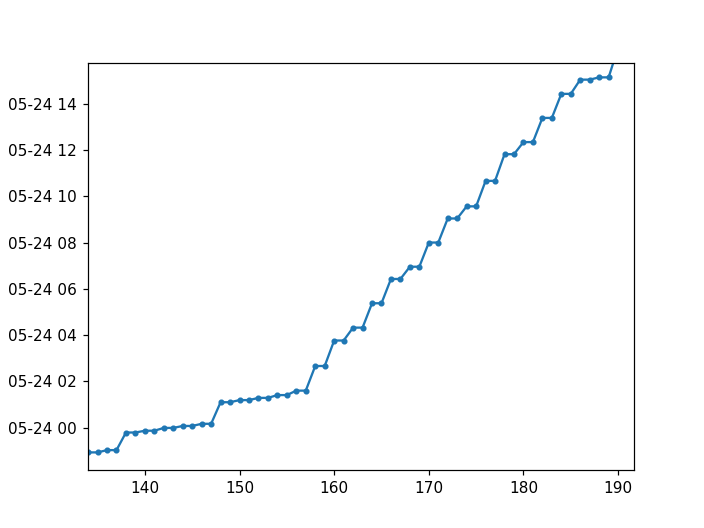

In [70]:
fig, ax = plt.subplots()
ax.plot(tlist, '.-')
ax.axhline(t1_utc)
ax.axhline(t2_utc)

In [8]:
for des in hdr.descriptors:
    for k,v in des['data_keys'].items():
        if 'external' in v:
            print(k)

merlin1
xspress3_ch1
xspress3_ch2
xspress3_ch3


In [53]:
e = list(db.get_events(hdr, stream_name='primary', fill=False))

In [54]:
len(e)

18000

In [55]:
e[120*136].data

{'Det1_Ca': 1.0002179931087083,
 'Det1_Cl': 1.0002179931087083,
 'Det1_Cr': 0.0,
 'Det1_Cu': 0.0,
 'Det1_Fe': 1.0002179931087083,
 'Det1_Ga': 0.0,
 'Det1_K': 0.0,
 'Det1_Mn': 0.0,
 'Det1_Ni': 0.0,
 'Det1_P': 9.001961937978376,
 'Det1_S': 0.0,
 'Det1_Se': 0.0,
 'Det1_Si': 143.03117301454532,
 'Det1_Te': 1.0002179931087083,
 'Det1_Ti': 0.0,
 'Det1_Zn': 0.0,
 'Det2_Ca': 0.0,
 'Det2_Cl': 0.0,
 'Det2_Cr': 0.0,
 'Det2_Cu': 0.0,
 'Det2_Fe': 0.0,
 'Det2_Ga': 0.0,
 'Det2_K': 0.0,
 'Det2_Mn': 0.0,
 'Det2_Ni': 0.0,
 'Det2_P': 6.001389077592115,
 'Det2_S': 0.0,
 'Det2_Se': 0.0,
 'Det2_Si': 173.04005173723937,
 'Det2_Te': 0.0,
 'Det2_Ti': 0.0,
 'Det2_Zn': 0.0,
 'Det3_Ca': 0.0,
 'Det3_Cl': 0.0,
 'Det3_Cr': 0.0,
 'Det3_Cu': 0.0,
 'Det3_Fe': 0.0,
 'Det3_Ga': 0.0,
 'Det3_K': 0.0,
 'Det3_Mn': 0.0,
 'Det3_Ni': 0.0,
 'Det3_P': 5.001050010748242,
 'Det3_S': 0.0,
 'Det3_Se': 1.0002100021496483,
 'Det3_Si': 141.0296103031004,
 'Det3_Te': 0.0,
 'Det3_Ti': 0.0,
 'Det3_Zn': 0.0,
 'alive': 0.15141780162230134,
 

In [66]:
dat = next(fsdb.datum.find({'datum_id': e[120*136-1].data['xspress3_ch2']}))
#dat = next(fsdb.datum.find({'datum_id': e[0].data['merlin1']}))

In [81]:
# before correction
dat

#120*136-1

{'_id': ObjectId('5923a5fee97f4e0979d03152'),
 'datum_id': '8081a60f-1b0c-49a5-b655-10d3d775512d',
 'datum_kwargs': {'channel': 2, 'frame': 16319},
 'resource': None}

In [15]:
dat['resource'] = rlist[113]['uid']

In [80]:
def update_datum(scanid, resource_list):
    print(scanid)
    hdr = db[scanid]
    subscan = hdr.start.subscan_dims
    elist = list(db.get_events(hdr, fill=False, stream_name='primary'))
    t1 = hdr.start.time
    t2 = hdr.stop.time
    timelist = [os.path.getmtime(r['root'] + '/' +  r['resource_path']) for r in resource_list]
    #timelist =  [r['_id'].generation_time for r in source_list]
    
    id_found = []
    for i,t in enumerate(timelist):
        if t1 < t< t2:
            if resource_list[i]['spec'] == 'XSP3':
                id_found.append(i)
                print('time:', i, t)
    print('number of h5 file: ', len(id_found))
    if len(id_found) != len(subscan):
        raise('size is inconsistent!')
    #if len(id_found) != 2:
    #    raise('len of data should be 2')
    num = 0
    file_id = -1
    for e in elist:
        for detid in range(3):
            detname = 'xspress3_ch' + str(detid+1)
            dat = next(fsdb.datum.find({'datum_id': e.data[detname]}))
            if detid==0 and dat['datum_kwargs']['frame']==0:
                file_id += 1
                
            dat['resource'] = resource_list[id_found[file_id]]['uid']
            
            # turn this on later when updating is needed
            #fsdb.datum.update_many(filter={'datum_id': e.data[detname]},
            #                       update={'$set':dat},
            #                       upsert=False)

In [86]:
runlist = [27768, 27822, 27825, 27835, 27840, 27845, 27849, 27851, 27858, 27860, 27873, 27883, 27888, 27892, 27912, 27917]
#large_list = [27768, 27845, 27849, 27860]
for num in runlist[-1:]:
    update_datum(num, rlist)

27917
time: 319 1495700523.7346997
number of h5 file:  1


<IPython.core.display.Javascript object>


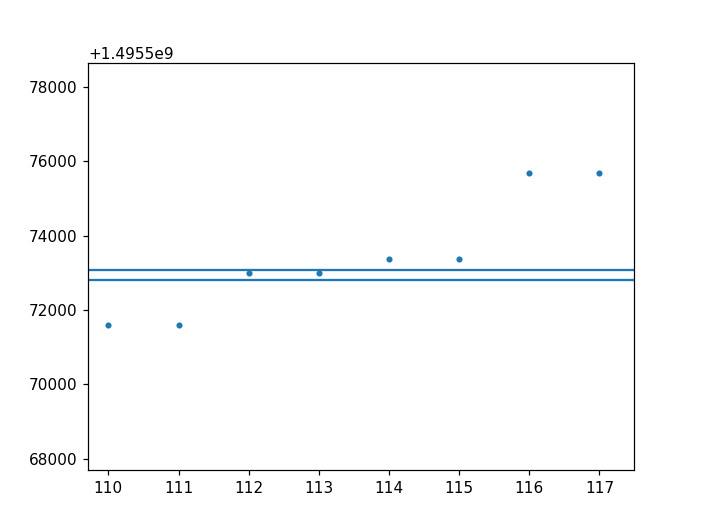

In [47]:
plt.close('all')
fig, ax = plt.subplots()
ax.plot(flist, '.')
ax.axhline(t1)
ax.axhline(t2)

In [5]:
file_start_time = os.path.getmtime(rlist[0]['root'] + '/' +  rlist[0]['resource_path'])
file_end_time = os.path.getmtime(rlist[-1]['root'] + '/' +  rlist[-1]['resource_path'])

In [ ]:
for i in range(len(problem_resources)):
    primary = missing[i]
    try:
        secondary = missing[i+1]
    except IndexError:
        break
    diff = s_time - p_time
    fsdb.datum.find({'time': {'$gte': p_time, '$lt': s_time }})
    

In [ ]:
a = next(fsdb.resource.find())['_id']

In [ ]:
a.generation_time